In [1]:
# import packages
import pandas as pd
import tensorflow as tf
from early_stopping_util import EarlyStoppingCallback
from models import fashion_mnist_cnn_classifier
from image_utils import display_image,load_image
from model_util import save_model,load_model 
from reporting_utils import batch_predict,predict_single,predict_images_from_test_set

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [3]:
# normalizing
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshaping to add 1 
x_train  = x_train.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)

In [4]:
model = fashion_mnist_cnn_classifier(optimizer='adam', loss='sparse_categorical_crossentropy')

# model fitting
history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=30,
        callbacks=[EarlyStoppingCallback()],
    )

Epoch 1/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5032 - accuracy: 0.8182 - val_loss: 0.2988 - val_accuracy: 0.8902
0.8630666732788086
Epoch 2/30
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2564 - accuracy: 0.9033 - val_loss: 0.3156 - val_accuracy: 0.8815
0.9051666855812073
Epoch 3/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1980 - accuracy: 0.9260 - val_loss: 0.2881 - val_accuracy: 0.8955
0.9243666529655457
Epoch 4/30
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1607 - accuracy: 0.9412 - val_loss: 0.2753 - val_accuracy: 0.9062
0.9393500089645386
Epoch 5/30
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1295 - accuracy: 0.9530 - val_loss: 0.3002 - val_accuracy: 0.9007
0.9492499828338623
Epoch 6/30
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1073 - accuracy: 0.9612 - val_loss: 0.2994 - val_accuracy: 0.9067
0.958133339881897
Epoch 7/30


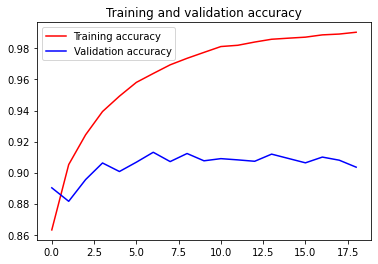

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [6]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.6630 - accuracy: 0.9035

Test accuracy: 0.9035000205039978


In [7]:
save_model(model,'./models/multi_class_image_cnn_classifier')

INFO:tensorflow:Assets written to: ./models/multi_class_image_cnn_classifier/assets


'Sandal'

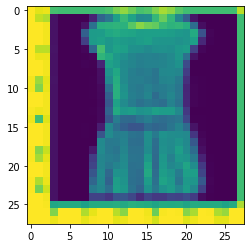

In [8]:
path = '/Users/prashunjaveri/Desktop/dress_1.jpeg'
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
correct_predictions = pd.DataFrame({ 'predictions': [3]  })
model = load_model('./models/multi_class_image_classifier')
image_shape = (28,28,1)
predict_single(path=path,
               model=model,
               shape=(28,28,1), 
               classes=class_names, 
               show_image=True,
               grey_scale=True )

'Dress'

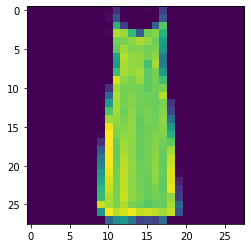

In [9]:
predict_images_from_test_set(model,x_test,class_names,13)

In [10]:
path = '/Users/prashunjaveri/Desktop/fashion_mnist'
batch_predict(path=path,
            model=model,
            shape=image_shape,
            classes=class_names,
            correct_predictions=correct_predictions,
            show_all = False ,
            grey_scale=True,
            show_correct = False)

{'errors': [{'file': 'dress_1.jpeg',
   'predictions': 5,
   'predicted_labels': 'Sandal',
   'expected': 3,
   'expected_labels': 'Dress'}],
 'percentage_error': 100.0}